<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Machine-Learning-2023/blob/main/4_5_Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 6.37MB/s]


# Hyperparameter tuning

In this notebook, we will use `max_depth` as an example of a hyperparameter, but there are several others like `n_neigbors` for k-Nearest Neighbor models and the regularization parameter `alpha` for Ridge Regression.

In Machine Learning, **parameters** are learned 'optimally' (according to the loss function) from the training set. For example, a linear regression algorithm will learn an intercept and coefficients for a 'best' fit of a linear function on the training data. In contrast, **hyperparameters** have to be set prior to training and are therefore not optimized automatically. To optimize hyperparameters, we will have to **tune** them.

We will fit a Decision Tree on the Wine dataset and tune the hyperparameter `max_depth`, but the same process works for any hyperparameter.

In [2]:
from pipetorch import DFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = DFrame.read_from_kaggle('uciml/red-wine-quality-cortez-et-al-2009')
df['quality'] = df.quality > 5
df = df[['pH', 'alcohol', 'quality']]
df

,pH,alcohol,quality
0,3.51,9.4,False
1,3.20,9.8,False
2,3.26,9.8,False
3,3.16,9.8,True
4,3.51,9.4,False
...,...,...,...
1594,3.45,10.5,False
1595,3.52,11.2,True
1596,3.42,11.0,True
1597,3.57,10.2,False


# Apply cross validation

To diagnose and validate the model, you have to split the dataset in a training and validation part before training like we did before with `train_test_split`.

In [4]:
# Prepare the data: scale and create train_X, train_y, valid_X and valid_y
# scale the data
train, valid = train_test_split(df, test_size=0.2)

train_X = train.drop(columns='quality').to_numpy()
train_y = train.quality.to_numpy()
valid_X = valid.drop(columns='quality').to_numpy()
valid_y = valid.quality.to_numpy()

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.transform(valid_X)

# Decision Tree

Fit a Decision Tree on all features with a maximum tree depth of 20. Report the accuracy of the model.

In [5]:
# Fit a decistion tree to the dataset
# and report the accuracy
model = DecisionTreeClassifier(max_depth=20)
model.fit(train_X, train_y)

pred_y = model.predict(valid_X)
accuracy_score(valid_y, pred_y)

0.690625

# Tune max_depth

We have picked a max_depth of 20, but we cannot be sure that is the optimal value for this hyperparameter. Sweep max_depth to the values 1 - 100 and plot the results.

In [13]:
# write a function that return the accuracy score that are obtained
# with resp. max_depth of 1-100. Should these be on the train or valid set?
def max_depth_accuracy_scores(X_train, y_train, X_valid, y_valid, max_depth_range):
    accuracy_scores = []

    for max_depth in max_depth_range:
        model = DecisionTreeClassifier(max_depth=max_depth)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_valid)

        accuracy = accuracy_score(y_valid, y_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores

accuracy_scores = max_depth_accuracy_scores(train_X, train_y, valid_X, valid_y, range(1, 101))
accuracy_scores

[0.71875,
 0.71875,
 0.715625,
 0.715625,
 0.71875,
 0.715625,
 0.709375,
 0.721875,
 0.7125,
 0.725,
 0.73125,
 0.709375,
 0.715625,
 0.715625,
 0.696875,
 0.690625,
 0.684375,
 0.69375,
 0.690625,
 0.696875,
 0.69375,
 0.69375,
 0.696875,
 0.68125,
 0.6875,
 0.68125,
 0.684375,
 0.68125,
 0.684375,
 0.684375,
 0.684375,
 0.684375,
 0.6875,
 0.68125,
 0.684375,
 0.68125,
 0.6875,
 0.684375,
 0.684375,
 0.68125,
 0.68125,
 0.684375,
 0.6875,
 0.68125,
 0.684375,
 0.6875,
 0.68125,
 0.6875,
 0.6875,
 0.68125,
 0.68125,
 0.6875,
 0.684375,
 0.68125,
 0.684375,
 0.68125,
 0.6875,
 0.684375,
 0.684375,
 0.684375,
 0.68125,
 0.684375,
 0.684375,
 0.684375,
 0.684375,
 0.684375,
 0.6875,
 0.684375,
 0.684375,
 0.68125,
 0.6875,
 0.68125,
 0.684375,
 0.684375,
 0.684375,
 0.684375,
 0.684375,
 0.684375,
 0.684375,
 0.6875,
 0.68125,
 0.68125,
 0.68125,
 0.68125,
 0.68125,
 0.6875,
 0.68125,
 0.6875,
 0.684375,
 0.684375,
 0.684375,
 0.68125,
 0.684375,
 0.68125,
 0.684375,
 0.684375,
 0.68437

When we plot this data as a graph, it is not very straightforward to read with its sawtooth shape. There may be a local optimum, but when we repeat the experiment, it may be somewhere else.

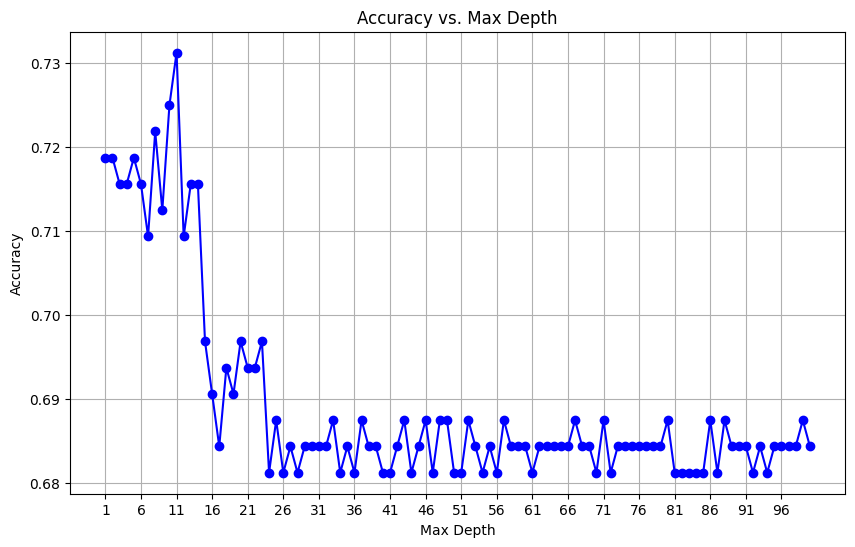

In [14]:
# plot a graph of the accuracy scores over max_depth
max_depth_range = range(1, 101)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 101, 5))  # Adjust x-axis ticks as needed
plt.show()

# Bootstrapping

In this case it may be a bit hard to interpret what the best setting is. There is a sampling bias that causes the optimal value to sometimes be at a high maximum depth, and sometimes at a lower. One way to cancel out the sampling bias is to perform a **bootstrap**: we can estimate the accuracy_score by repeating the experiment `n` times, resampling the train-test split from the original dataset ang taking the average accuracy_score. This reveals that up until max_depth=15 the model improves, and after that the results are comparable. A possible explanation for not improving further is that there are only 11 features in this dataset and using a higher max_depth does not really do anything.

Most common in hyperparameter tuning is that there is an optimal region, before and after which results are suboptimal, possibly due to an effect that we call underfitting and overfitting.

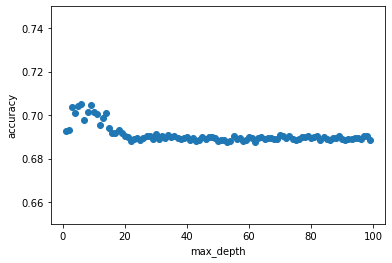

In [ ]:
# Perform a bootstrapping experiment, trying each max_depth 20 times
# and taking the average accuracy over those 20 trials
# A scatter plot may be easier to read
# Enter your code here

# SVM

Now we will do the same for a Support Vector Machine. One of its hyperparameters is a regularization setting, that has a standard value of 1.0. Repeat the above steps with the following exceptions:
- instantiate an SVC with C set to the given value.

In [ ]:
# complete this function that sweeps values for C
# and for each value fits and SVC and returns the accuracy score
def svc_accuracy_scores():
    accuracy_scores = []
    for C in np.linspace(1.0, 10.0, 20):
# Enter your code here

Now with an SVM you will see that the default setting C=1.0 already obtains a slightly higher accuracy over the decision tree. When we tune the parameter C, it appears that a better setting is around C=6.0 ... 7.0 increasing the performance by one percent.

In [ ]:
# again, bootstrap the SVC experiment to get a more smooth analysis of
# where the optimum value for C is
# Enter your code here

In [ ]:
halt_notebook()